In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
# Step 2: Data Preprocessing
print(df.isnull().sum())  # Check for missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values if any

# Scaling the 'Time' and 'Amount' columns
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


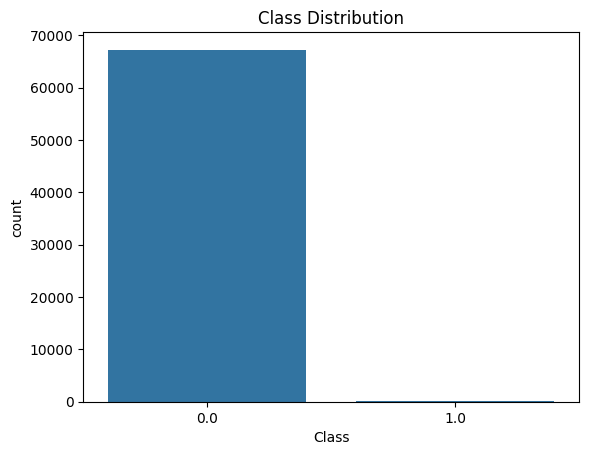

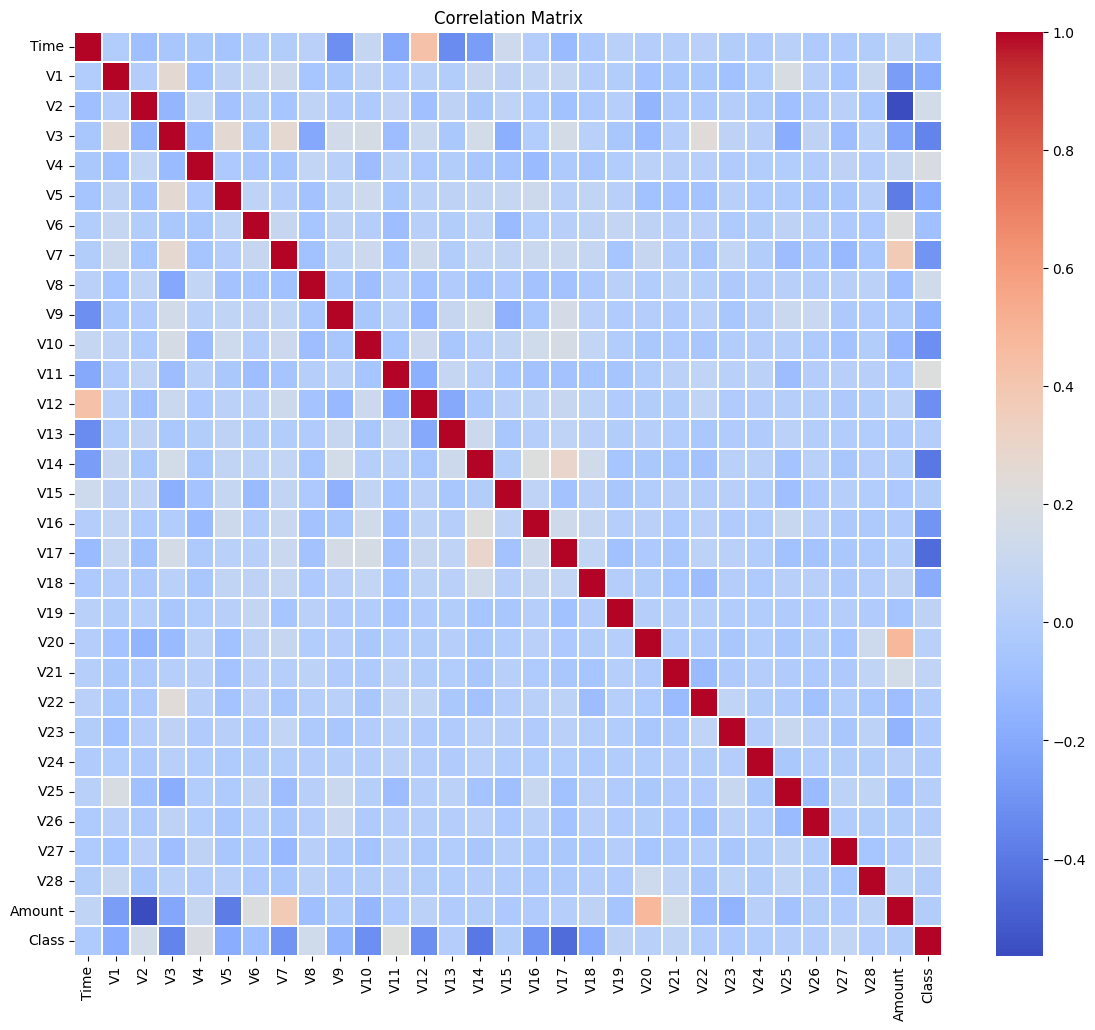

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
# Distribution of classes
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Step 4: Feature Engineering
# No additional feature engineering needed for this example

# Step 5: Train-Test Split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Step 6: Model Training
# Using Random Forest Classifier for this example
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Training Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     53812
         1.0       1.00      1.00      1.00       135

    accuracy                           1.00     53947
   macro avg       1.00      1.00      1.00     53947
weighted avg       1.00      1.00      1.00     53947

[[53812     0]
 [    0   135]]
Testing Evaluation:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13453
         1.0       0.87      0.76      0.81        34

    accuracy                           1.00     13487
   macro avg       0.93      0.88      0.91     13487
weighted avg       1.00      1.00      1.00     13487

[[13449     4]
 [    8    26]]


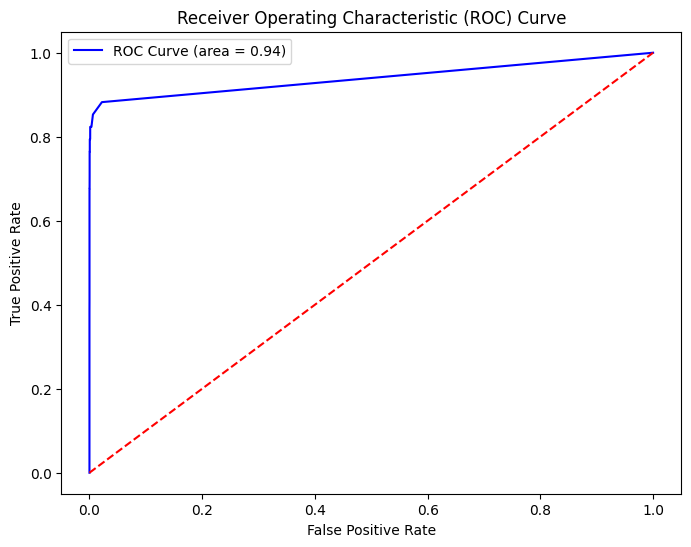

AUC: 0.94


In [7]:
# Step 7: Model Evaluation
print("Training Evaluation:")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("Testing Evaluation:")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

# ROC Curve and AUC
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f'AUC: {roc_auc:.2f}')